In [1]:
# Import Dependencies
import citipy
import json
import requests
import pandas as pd
from config import api_key
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Save config information(Base URL)
url = "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
city_name = "London"
query_url = url + "appid=" + api_key + "&q=" + city_name
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=London


In [4]:
#Json-ify this

city_name = "London"
query_url = url + "appid=" + api_key + "&q=" + city_name
response = requests.get(query_url).json()
print(json.dumps(response, indent = 4) )

{
    "coord": {
        "lon": -0.13,
        "lat": 51.51
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 274.14,
        "pressure": 1023,
        "humidity": 64,
        "temp_min": 273.15,
        "temp_max": 275.15
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.6,
        "deg": 360
    },
    "clouds": {
        "all": 40
    },
    "dt": 1521507000,
    "sys": {
        "type": 1,
        "id": 5091,
        "message": 0.0052,
        "country": "GB",
        "sunrise": 1521525804,
        "sunset": 1521569611
    },
    "id": 2643743,
    "name": "London",
    "cod": 200
}


In [5]:
#Create the dataframe to hold all the cities. Trying to create a list of cities
cities = []

lats = np.random.uniform(-90.00,90.00, size = 1500)
print(lats)
#Store 500 random Longitudes from -180 to +180 in a list
lons = np.random.uniform(-180.00, 180.00, size = 1500)
print(lons)

[-18.96430077 -68.53853154  36.14368507 ...,  61.03004525  37.77182468
  -8.88212204]
[-136.68550857 -108.15751554 -147.92101624 ...,  -59.26162054 -118.29212874
  -83.84073175]


In [6]:
#Loop through the latitudes and longitudes to get the nearest city. The citipy API uses a 
#method called city_name to give the name of the nearest city
for i in range(len(lats)):
   city = citipy.nearest_city(lats[i], lons[i]).city_name
   
   #Only Unique cities in the final Cities List
   if city not in cities:
       cities.append(city)
print(cities)

['rikitea', 'punta arenas', 'kahului', 'cape town', 'saskylakh', 'ushuaia', 'vaini', 'hermanus', 'albany', 'aquiraz', 'zhigansk', 'qaanaaq', 'karratha', 'grand centre', 'kiunga', 'tocopilla', 'half moon bay', 'kapaa', 'taolanaro', 'ternate', 'mar del plata', 'atuona', 'maragogi', 'ilulissat', 'busselton', 'avarua', 'kiama', 'hamilton', 'krasnik', 'billings', 'ribeira grande', 'new norfolk', 'oussouye', 'makinsk', 'pangnirtung', 'mwingi', 'sur', 'mataura', 'cairns', 'chilca', 'lebu', 'thompson', 'bluff', 'taoudenni', 'gzhatsk', 'amderma', 'wenden', 'college', 'puerto ayora', 'hilo', 'swellendam', 'kendari', 'chivilcoy', 'airai', 'sampit', 'georgetown', 'pevek', 'tautira', 'la peca', 'ancud', 'te anau', 'ostrovnoy', 'yellowknife', 'saravan', 'mys shmidta', 'cortland', 'salym', 'kurilsk', 'narsaq', 'portland', 'grand forks', 'semey', 'nome', 'port-gentil', 'tiarei', 'port alfred', 'barentsburg', 'attawapiskat', 'hobart', 'atar', 'castro', 'arbuzynka', 'temaraia', 'comodoro rivadavia', 'di

In [7]:
#Create a Data Frame with city names and call the colmn City
cities_df = pd.DataFrame(cities, columns=["City"])
cities_df

,City
0,rikitea
1,punta arenas
2,kahului
3,cape town
4,saskylakh
5,ushuaia
6,vaini
7,hermanus
8,albany
9,aquiraz


In [8]:
#Add columns Latitude, Humidity, Cloudiness, Wind_Speed to the data frame
cities_df["Latitude"] = ''
cities_df["Temperature"] = ''
cities_df["Humidity"] = ''
cities_df["Cloudiness"] = ''
cities_df["Wind_Speed"] = ''
cities_df

,City,Latitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,rikitea,,,,,
1,punta arenas,,,,,
2,kahului,,,,,
3,cape town,,,,,
4,saskylakh,,,,,
5,ushuaia,,,,,
6,vaini,,,,,
7,hermanus,,,,,
8,albany,,,,,
9,aquiraz,,,,,


In [9]:
# Build query URL by iterating over the Data Frame
for index, row in cities_df.iterrows():
    city_name = row['City']
    query_url = url + "appid=" + api_key + "&q=" + city_name
    print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kahului
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cape town
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vaini
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hermanus
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=albany
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=aquiraz
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rolla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=naryan-mar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint george
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rockford
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rumford
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=norman wells
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nizhniy kuranakh


In [10]:
#Print City info
print(f"Retrieving Weather Details for City Number- {index}: City Name- {city_name}: Weather URL- {query_url}")

Retrieving Weather Details for City Number- 613: City Name- pimentel: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pimentel


In [11]:
weather_response = requests.get(query_url).json()
weather_response

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -3.7, 'lon': -45.5},
 'dt': 1521511044,
 'id': 3389609,
 'main': {'grnd_level': 1016.88,
  'humidity': 83,
  'pressure': 1016.88,
  'sea_level': 1023.45,
  'temp': 299.045,
  'temp_max': 299.045,
  'temp_min': 299.045},
 'name': 'Pimentel',
 'sys': {'country': 'BR',
  'message': 0.0081,
  'sunrise': 1521536766,
  'sunset': 1521580357},
 'weather': [{'description': 'broken clouds',
   'icon': '04n',
   'id': 803,
   'main': 'Clouds'}],
 'wind': {'deg': 17.002, 'speed': 2.23}}

In [12]:
#Converting Kelvin to Farenheit
tempF = 1.8 * (weather_response["main"]["temp"] -273) + 32
print(tempF)
cities_df.set_value(index, 'Latitude', weather_response["coord"]["lat"])
cities_df.set_value(index, 'Temperature', tempF)
#cities_df.set_value(index, 'Temperature', weather_response["main"]["temp"])
cities_df.set_value(index, 'Humidity', weather_response["main"]["humidity"])
cities_df.set_value(index, 'Cloudiness', weather_response["clouds"]["all"])
cities_df.set_value(index, 'Wind_Speed', weather_response["wind"]["speed"])

print(cities_df)

78.88100000000003
                  City Latitude Temperature Humidity Cloudiness Wind_Speed
0              rikitea                                                    
1         punta arenas                                                    
2              kahului                                                    
3            cape town                                                    
4            saskylakh                                                    
5              ushuaia                                                    
6                vaini                                                    
7             hermanus                                                    
8               albany                                                    
9              aquiraz                                                    
10            zhigansk                                                    
11             qaanaaq                                                    
12     

In [13]:
# Build query URL by iterating over the Data Frame
for index, row in cities_df.iterrows():

   # get city name from cities dataframe and perform a weather check by using a series of successive
   # weather calls
   city_name = row['City']
   query_url = url + "appid=" + api_key + "&q=" + city_name

In [14]:
for index, row in cities_df.iterrows():

   # get city name from cities dataframe and perform a weather check by using a series of successive
   # weather calls
   city_name = row['City']
   query_url = url + "appid=" + api_key + "&q=" + city_name
   
   #Print City info
   print(f"Retrieving Weather Details for City Number- {index}: City Name- {city_name}: Weather URL- {query_url}")
   
   #The next 7 lines of code are written because I noticed that for some city names generated by citipy,
   #weather map does not have the weather info !! This caused runtime errors in my code and also while plotting. 
   #The weather API throws a 404 error when it encounters such a city. I capture the status code of the request , if 
   #404 then it drops the offending row from the data frame and continues with the next city in the loop. 
   #Maybe there is a better way of doing this....
    
   http_resp = requests.get(query_url)
   print(http_resp)
   if http_resp.status_code == 404:
       #print("Dropping index number "+ str(index))
       print(f"no weather details exist for City Number- {index}: City Name- {city_name}, dropping it off the data frame")
       cities_df.drop(index, inplace=True)
       continue
    
   weather_response = requests.get(query_url).json() 
  
   #Converting Kelvin to Farenheit
   tempF = 1.8 * (weather_response["main"]["temp"] -273) + 32
   print(tempF)
   
   cities_df.set_value(index, 'Latitude', weather_response["coord"]["lat"])
   cities_df.set_value(index, 'Temperature', tempF)
   #cities_df.set_value(index, 'Temperature', weather_response["main"]["temp"])
   cities_df.set_value(index, 'Humidity', weather_response["main"]["humidity"])
   cities_df.set_value(index, 'Cloudiness', weather_response["clouds"]["all"])
   cities_df.set_value(index, 'Wind_Speed', weather_response["wind"]["speed"])

print(cities_df)

Retrieving Weather Details for City Number- 0: City Name- rikitea: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rikitea
<Response [200]>
79.78100000000003
Retrieving Weather Details for City Number- 1: City Name- punta arenas: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta arenas
<Response [200]>
43.06999999999996
Retrieving Weather Details for City Number- 2: City Name- kahului: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kahului
<Response [200]>
70.62799999999996
Retrieving Weather Details for City Number- 3: City Name- cape town: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cape town
<Response [200]>
59.26999999999996
Retrieving Weather Details for City Number- 4: City Name- saskylakh: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a

<Response [200]>
74.65099999999998
Retrieving Weather Details for City Number- 38: City Name- cairns: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cairns
<Response [200]>
88.06999999999996
Retrieving Weather Details for City Number- 39: City Name- chilca: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chilca
<Response [200]>
55.66999999999996
Retrieving Weather Details for City Number- 40: City Name- lebu: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lebu
<Response [200]>
55.66999999999996
Retrieving Weather Details for City Number- 41: City Name- thompson: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=thompson
<Response [200]>
16.069999999999958
Retrieving Weather Details for City Number- 42: City Name- bluff: Weather URL- http://api.openweathermap.org/data/2.5/weathe

<Response [200]>
60.88100000000003
Retrieving Weather Details for City Number- 76: City Name- barentsburg: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=barentsburg
<Response [404]>
no weather details exist for City Number- 76: City Name- barentsburg, dropping it off the data frame
Retrieving Weather Details for City Number- 77: City Name- attawapiskat: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=attawapiskat
<Response [404]>
no weather details exist for City Number- 77: City Name- attawapiskat, dropping it off the data frame
Retrieving Weather Details for City Number- 78: City Name- hobart: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hobart
<Response [200]>
53.86999999999996
Retrieving Weather Details for City Number- 79: City Name- atar: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f1

<Response [200]>
7.069999999999958
Retrieving Weather Details for City Number- 112: City Name- avera: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=avera
<Response [200]>
64.66999999999996
Retrieving Weather Details for City Number- 113: City Name- ust-omchug: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ust-omchug
<Response [200]>
-5.179000000000002
Retrieving Weather Details for City Number- 114: City Name- nikolskoye: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nikolskoye
<Response [200]>
30.46999999999996
Retrieving Weather Details for City Number- 115: City Name- tuktoyaktuk: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tuktoyaktuk
<Response [200]>
-2.9559999999999818
Retrieving Weather Details for City Number- 116: City Name- sentyabrskiy: Weather URL- http://

<Response [200]>
62.86999999999996
Retrieving Weather Details for City Number- 149: City Name- russkaya polyana: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=russkaya polyana
<Response [200]>
10.121000000000048
Retrieving Weather Details for City Number- 150: City Name- wanning: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=wanning
<Response [200]>
23.26999999999996
Retrieving Weather Details for City Number- 151: City Name- east london: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=east london
<Response [200]>
68.08100000000003
Retrieving Weather Details for City Number- 152: City Name- grand gaube: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=grand gaube
<Response [200]>
79.06999999999996
Retrieving Weather Details for City Number- 153: City Name- hegang: Weather UR

<Response [200]>
83.11099999999996
Retrieving Weather Details for City Number- 186: City Name- khatanga: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=khatanga
<Response [200]>
4.631000000000029
Retrieving Weather Details for City Number- 187: City Name- ossora: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ossora
<Response [200]>
10.93100000000003
Retrieving Weather Details for City Number- 188: City Name- the valley: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=the valley
<Response [200]>
77.26999999999995
Retrieving Weather Details for City Number- 189: City Name- deputatskiy: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=deputatskiy
<Response [200]>
-17.59900000000001
Retrieving Weather Details for City Number- 190: City Name- mahajanga: Weather URL- http://api.ope

<Response [404]>
no weather details exist for City Number- 223: City Name- marcona, dropping it off the data frame
Retrieving Weather Details for City Number- 224: City Name- virginia beach: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=virginia beach
<Response [200]>
49.45999999999998
Retrieving Weather Details for City Number- 225: City Name- esperance: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=esperance
<Response [200]>
75.46999999999997
Retrieving Weather Details for City Number- 226: City Name- bandarbeyla: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bandarbeyla
<Response [200]>
78.25099999999999
Retrieving Weather Details for City Number- 227: City Name- baghdad: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=baghdad
<Response [200]>
57.469999999999956
Retrie

<Response [200]>
49.87400000000001
Retrieving Weather Details for City Number- 261: City Name- aljezur: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=aljezur
<Response [200]>
52.060999999999964
Retrieving Weather Details for City Number- 262: City Name- natal: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=natal
<Response [200]>
80.86999999999996
Retrieving Weather Details for City Number- 263: City Name- valday: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=valday
<Response [200]>
28.39100000000001
Retrieving Weather Details for City Number- 264: City Name- amapa: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=amapa
<Response [200]>
80.86999999999996
Retrieving Weather Details for City Number- 265: City Name- illoqqortoormiut: Weather URL- http://api.openweathermap.org/d

<Response [200]>
17.321000000000048
Retrieving Weather Details for City Number- 298: City Name- puerto madryn: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=puerto madryn
<Response [200]>
53.141000000000005
Retrieving Weather Details for City Number- 299: City Name- adrar: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=adrar
<Response [200]>
68.26999999999995
Retrieving Weather Details for City Number- 300: City Name- clyde river: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=clyde river
<Response [200]>
-16.32999999999999
Retrieving Weather Details for City Number- 301: City Name- reutte: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=reutte
<Response [200]>
21.469999999999956
Retrieving Weather Details for City Number- 302: City Name- saleaula: Weather URL- http://api.o

24.043999999999972
Retrieving Weather Details for City Number- 334: City Name- topeka: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=topeka
<Response [200]>
47.82200000000004
Retrieving Weather Details for City Number- 335: City Name- berlevag: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=berlevag
<Response [200]>
23.531000000000027
Retrieving Weather Details for City Number- 336: City Name- mildura: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mildura
<Response [200]>
71.86099999999996
Retrieving Weather Details for City Number- 337: City Name- ghanzi: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ghanzi
<Response [200]>
63.310999999999964
Retrieving Weather Details for City Number- 338: City Name- huilong: Weather URL- http://api.openweathermap.org/data/2.5/weather?

<Response [200]>
91.66999999999996
Retrieving Weather Details for City Number- 372: City Name- lokosovo: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lokosovo
<Response [200]>
16.960999999999967
Retrieving Weather Details for City Number- 373: City Name- sitka: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sitka
<Response [200]>
39.55099999999999
Retrieving Weather Details for City Number- 374: City Name- umzimvubu: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=umzimvubu
<Response [404]>
no weather details exist for City Number- 374: City Name- umzimvubu, dropping it off the data frame
Retrieving Weather Details for City Number- 375: City Name- guerrero negro: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=guerrero negro
<Response [200]>
62.59100000000001
Retrieving Wea

<Response [200]>
7.871000000000048
Retrieving Weather Details for City Number- 409: City Name- haibowan: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=haibowan
<Response [404]>
no weather details exist for City Number- 409: City Name- haibowan, dropping it off the data frame
Retrieving Weather Details for City Number- 410: City Name- mayo: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mayo
<Response [200]>
37.66999999999996
Retrieving Weather Details for City Number- 411: City Name- khani: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=khani
<Response [200]>
55.66999999999996
Retrieving Weather Details for City Number- 412: City Name- san borja: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san borja
<Response [200]>
73.84100000000001
Retrieving Weather Details for City 

<Response [200]>
59.17100000000005
Retrieving Weather Details for City Number- 447: City Name- crixas: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=crixas
<Response [200]>
72.67100000000005
Retrieving Weather Details for City Number- 448: City Name- bria: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bria
<Response [200]>
68.441
Retrieving Weather Details for City Number- 449: City Name- ulladulla: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ulladulla
<Response [200]>
73.66999999999996
Retrieving Weather Details for City Number- 450: City Name- uusikaupunki: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=uusikaupunki
<Response [200]>
28.66999999999996
Retrieving Weather Details for City Number- 451: City Name- caiaponia: Weather URL- http://api.openweathermap.org/data

<Response [200]>
73.66099999999997
Retrieving Weather Details for City Number- 485: City Name- darhan: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=darhan
<Response [200]>
47.65099999999999
Retrieving Weather Details for City Number- 486: City Name- hanzhong: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hanzhong
<Response [200]>
46.48100000000003
Retrieving Weather Details for City Number- 487: City Name- battle creek: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=battle creek
<Response [200]>
33.76400000000003
Retrieving Weather Details for City Number- 488: City Name- ugoofaaru: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ugoofaaru
<Response [200]>
83.56099999999998
Retrieving Weather Details for City Number- 489: City Name- pochutla: Weather URL- http://api.openw

<Response [200]>
24.40399999999995
Retrieving Weather Details for City Number- 523: City Name- abu dhabi: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=abu dhabi
<Response [200]>
66.39800000000002
Retrieving Weather Details for City Number- 524: City Name- togur: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=togur
<Response [200]>
20.831000000000028
Retrieving Weather Details for City Number- 525: City Name- kerchevskiy: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kerchevskiy
<Response [200]>
21.281000000000027
Retrieving Weather Details for City Number- 526: City Name- salinopolis: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=salinopolis
<Response [200]>
82.03100000000003
Retrieving Weather Details for City Number- 527: City Name- canaries: Weather URL- http://api.o

<Response [200]>
82.21099999999997
Retrieving Weather Details for City Number- 560: City Name- camacha: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=camacha
<Response [200]>
62.096000000000046
Retrieving Weather Details for City Number- 561: City Name- clarksburg: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=clarksburg
<Response [200]>
50.70199999999998
Retrieving Weather Details for City Number- 562: City Name- bairiki: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bairiki
<Response [404]>
no weather details exist for City Number- 562: City Name- bairiki, dropping it off the data frame
Retrieving Weather Details for City Number- 563: City Name- yei: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yei
<Response [404]>
no weather details exist for City Number- 563: City 

<Response [200]>
82.21099999999997
Retrieving Weather Details for City Number- 597: City Name- mehamn: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mehamn
<Response [200]>
16.15099999999999
Retrieving Weather Details for City Number- 598: City Name- talcahuano: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=talcahuano
<Response [200]>
59.26999999999996
Retrieving Weather Details for City Number- 599: City Name- muroto: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=muroto
<Response [200]>
57.469999999999956
Retrieving Weather Details for City Number- 600: City Name- bogorodskoye: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bogorodskoye
<Response [200]>
15.97100000000005
Retrieving Weather Details for City Number- 601: City Name- panji: Weather URL- http://api.openweath

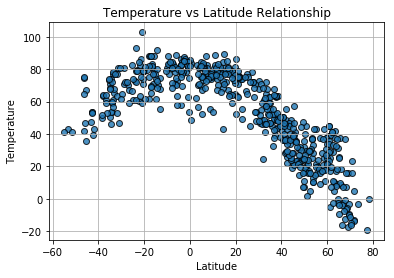

In [15]:
# Build a scatter plot for Latitude vs Temperature
plt.scatter(cities_df["Latitude"],
           cities_df["Temperature"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="LatvsTemp")

# Incorporate the other graph properties
plt.title("Temperature vs Latitude Relationship")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
#plt.xlim([-2.5, 202])

# Save the figure
plt.savefig("LatvsTemp.png")

# Show plot
plt.show()

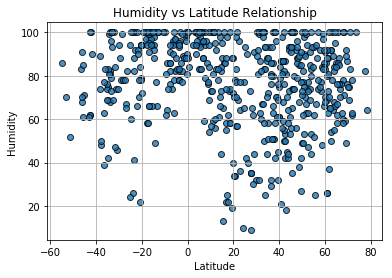

In [16]:
# Build a scatter plot for Latitude vs Humidity
plt.scatter(cities_df["Latitude"],
           cities_df["Humidity"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="LatvsHumidity")

# Incorporate the other graph properties
plt.title("Humidity vs Latitude Relationship")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
#plt.xlim([-2.5, 202])

# Save the figure
plt.savefig("LatvsHumidity.png")

# Show plot
plt.show()

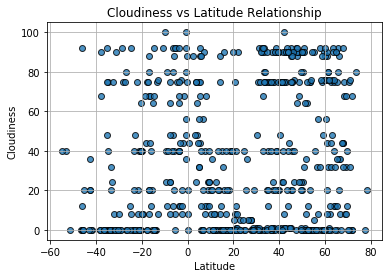

In [20]:
# Build a scatter plot for Cloudiness vs Temperature
plt.scatter(cities_df["Latitude"],
           cities_df["Cloudiness"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="LatvsCloudiness")

# Incorporate the other graph properties
plt.title("Cloudiness vs Latitude Relationship")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
#plt.xlim([-2.5, 202])

# Save the figure
plt.savefig("LatvsCloudiness.png")

# Show plot
plt.show()

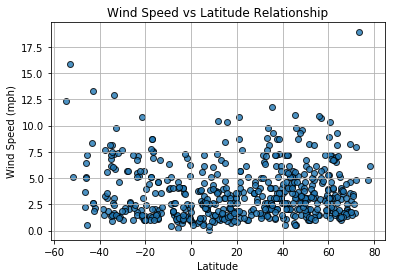

In [21]:
# Build a scatter plot for Latitude vs Wind Speed (mph)
plt.scatter(cities_df["Latitude"],
           cities_df["Wind_Speed"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="LatvsWindSpeed")

# Incorporate the other graph properties
plt.title("Wind Speed vs Latitude Relationship")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
#plt.xlim([-2.5, 202])

# Save the figure
plt.savefig("LatvsWindSpeed.png")

# Show plot
plt.show()

In [ ]:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude